In [1]:
# The code was removed by Watson Studio for sharing.

## London Crime Statistics

>**Data source:** London data store , Greater London Authority   
**Source link:** https://data.london.gov.uk/dataset/recorded_crime_summary  
**Data details:**  MPS Borough Level Crime (most recent 24 months) , MPS LSOA Level Crime (most recent 24 months) 

In [2]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import json # library to handle JSON files
import requests # library to handle requests
import csv
import lxml.html as lh
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


#!conda install --channel conda-forge geopandas --yes

import geopandas as gpd

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.datasets.samples_generator import make_blobs


# import k-means from clustering stage
from sklearn.cluster import KMeans

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

print('Libraries imported.')




Libraries imported.


In [3]:
crime=pd.read_csv("https://data.london.gov.uk/download/recorded_crime_summary/644a9e0d-75a3-4c3a-91ad-03d2a7cb8f8e/MPS%20LSOA%20Level%20Crime%20%28most%20recent%2024%20months%29.csv")
crime.head()

,LSOA Code,Borough,Major Category,Minor Category,201710,201711,201712,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,201906,201907,201908,201909
0,E01000006,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,E01000007,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,E01000008,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,E01000009,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,E01000010,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,0,0,0,0,0,2,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0


In [4]:
crime.rename(columns = {'LSOA Code': 'LSOA'} ,inplace = True)
crime.drop(['201710','201711','201712','201801','201802','201803','201804','201805','201806','201807','201808','201809'], axis=1, inplace=True)
crime['Sum_Crime'] =crime.sum(axis=1)
#crime=crime [['Borough','LSOA','Sum_Crime']]
crime.head(10)

,LSOA,Borough,Major Category,Minor Category,201810,201811,201812,201901,201902,201903,201904,201905,201906,201907,201908,201909,Sum_Crime
0,E01000006,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,0,0,1,0,0,0,0,0,0,1
1,E01000007,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,0,0,0,0,0,0,0,0,0,0
2,E01000008,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,0,0,0,0,0,0,0,0,0,0
3,E01000009,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,0,0,0,0,0,0,0,0,0,0
4,E01000010,Barking and Dagenham,Arson and Criminal Damage,Arson,1,0,0,1,0,0,0,1,0,0,0,0,3
5,E01000012,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,0,0,0,0,0,0,0,0,0,0
6,E01000013,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,0,0,0,0,0,0,0,0,0,0
7,E01000015,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,0,0,0,0,0,0,0,0,0,0
8,E01000016,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,0,0,1,1,0,0,0,0,0,2
9,E01000021,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,0,0,0,0,0,1,0,0,0,1


In [5]:
crime_min_cat=crime.groupby(['Minor Category'])['Sum_Crime'].sum().reset_index()
crime_min_cat = crime_min_cat.sort_values(by = 'Sum_Crime', axis = 0, ascending = True)                                            
crime_min_cat.reset_index(drop = True, inplace = True)
crime_min_cat

,Minor Category,Sum_Crime
0,Concealing an Infant Death Close to Birth,1
1,Wildlife Crime,4
2,Perjury,6
3,Bigamy,17
4,Exploitation of Prostitution,21
5,Other Firearm Offences,23
6,Absconding from Lawful Custody,42
7,Forgery or Use of Drug Prescription,45
8,"Disclosure, Obstruction, False or Misleading S...",50
9,Bail Offences,52


In [6]:
crime_borough=crime.groupby(['Borough'])['Sum_Crime'].sum().reset_index()
crime_borough = crime_borough.sort_values(by = 'Sum_Crime', axis = 0, ascending = True)                                            
crime_borough.reset_index(drop = True, inplace = True)
crime_borough

,Borough,Sum_Crime
0,Kingston upon Thames,12308
1,Richmond upon Thames,12470
2,Sutton,13025
3,Merton,14090
4,Harrow,16089
5,Bexley,16882
6,Havering,18142
7,Barking and Dagenham,18430
8,Hammersmith and Fulham,21705
9,Kensington and Chelsea,22637


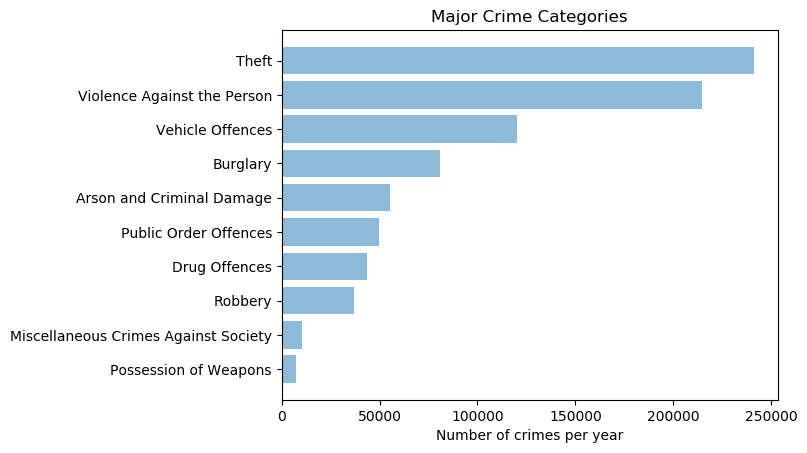

In [7]:
crime_maj_cat=crime.groupby(['Major Category'])['Sum_Crime'].sum().reset_index()
crime_maj_cat = crime_maj_cat.sort_values(by = 'Sum_Crime', axis = 0, ascending = True)                                            
crime_maj_cat.reset_index(drop = True, inplace = True)
crime_maj_cat


import matplotlib.pyplot as plt; plt.rcdefaults()

y =  crime_maj_cat['Major Category']
x = crime_maj_cat['Sum_Crime']
y_pos = np.arange(len(y))
 
# Create horizontal bars
plt.barh(y_pos, x,  align='center', alpha=0.5)
 
# Create names on the y-axis
plt.yticks(y_pos, y)
 
plt.xlabel('Number of crimes per year')
plt.title('Major Crime Categories')
# Show graphic
plt.show()



In [8]:
crime_LSOA=crime.groupby(['LSOA'])['Sum_Crime'].sum().reset_index()
crime_LSOA.head()

,LSOA,Sum_Crime
0,E01000006,105
1,E01000007,468
2,E01000008,215
3,E01000009,271
4,E01000010,1438


In [9]:
crime_LSOA.describe()

,Sum_Crime
count,4829.000000
mean,178.220335
std,302.457483
min,14.000000
25%,84.000000
50%,121.000000
75%,184.000000
max,9074.000000


Text(0, 0.5, 'LSOAs')

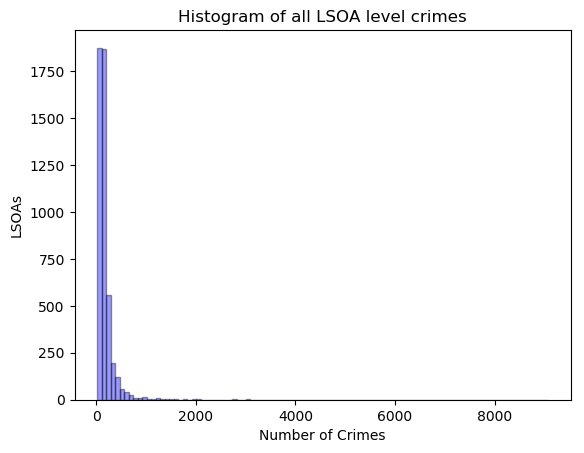

In [10]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
#plt.hist(crime_LSOA['Sum_Crime'], color = 'blue', edgecolor = 'black',bins = 500)

#seaborn histogram
sns.distplot(crime_LSOA['Sum_Crime'], hist=True, kde=False, 
           bins=100, color = 'blue',
           hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of all LSOA level crimes')
plt.xlabel('Number of Crimes')
plt.ylabel('LSOAs')


In order to calculate crime per 1000 person, we will pull LSOA level population data

>**Data source:** London data store , Greater London Authority  
**Source link:** https://data.london.gov.uk/dataset/lsoa-atlas  
**Data details:**  LSOA Level population data to calculate crime rate per population ,Current LSOA boundaries post 2011

In [11]:
population=pd.read_excel("https://data.london.gov.uk/download/lsoa-atlas/b8e01c3a-f5e3-4417-82b3-02ad271e6ee8/lsoa-data.xls", header=1)
population.head()

,Unnamed: 0,Unnamed: 1,All Ages,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Aged 0-15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Aged 16-29,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Aged 30-44,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Aged 45-64,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Aged 65+,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Working-age,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Age Structure,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Area (Hectares),Persons per hectare,Unnamed: 102,All households,Couple household with dependent children,Couple household without dependent children,Lone parent household,One person household,Other household Types,% Couple household with dependent children,% Couple household without dependent children,% Lone parent household,% One person household,% Other multi person household,White,Mixed/multiple ethnic groups,Asian/Asian British,Black/African/Caribbean/Black British,Other ethnic group,BAME,White (%),Mixed/multiple ethnic groups (%),Asian/Asian British (%),Black/African/Caribbean/Black British (%),Other ethnic group (%),BAME (%),United Kingdom,Not United Kingdom,% United Kingdom,% Not United Kingdom,Households with at least one person aged 16 or over with English as a main language,Households where no people aged 16 or over have English as a main language,% of households with at least one person aged 16 or over with English as a main language,% of households where no people aged 16 or over have English as a main language,Christian,Buddhist,Hindu,Jewish,Muslim,Sikh,Other religion,No religion,Religion not stated,Christian (%),Buddhist (%),Hindu (%),Jewish (%),Muslim (%),Sikh (%),Other religion (%),No religion (%),Religion not stated (%),Owned outright,Owned with a mortgage or loan,Social rented,Private rented,Owned outright (%),Owned with a mortgage or loan (%),Social rented (%),Private rented (%),All Households,Household spaces with at least one usual resident,Household spaces with no usual residents,Whole house or bungalow: Detached,Whole house or bungalow: Semi-detached,Whole house or bungalow: Terraced (including end-terrace),"Flat, maisonette or apartment",Household spaces with at least one usual resident (%),Household spaces with no usual residents (%),Whole house or bungalow: Detached (%),Whole house or bungalow: Semi-detached (%),Whole house or bungalow: Terraced (including end-terrace) (%),"Flat, maisonette or apartment (%)",Median Price (£),Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Sales,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184
0,Codes,Names,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,All Ages,0-15,16-29,30-44,45-64,65+,Working-age,NaN,2012.000000,2013.000000,2011,2011,2011,2011,2011,2011,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011,2011,2011,2011,2011,2011,2011.000000,2011.000000,2011.00

In [12]:
population=population[['Unnamed: 0', 'Unnamed: 14']]
population=population.drop(population.index[0]).reset_index(drop=True)
population.rename(columns = {'Unnamed: 0' : 'LSOA','Unnamed: 14': 'Population'} ,inplace = True)
population.head()

,LSOA,Population
0,E01000907,1466
1,E01000908,1647
2,E01000909,1642
3,E01000912,1653
4,E01000913,1827


In [13]:
population.describe()

,Population
count,4835.000000
mean,1740.751810
std,304.551285
min,965.000000
25%,1550.000000
50%,1690.000000
75%,1878.000000
max,6139.000000


Lets calculate crime per person for each LSOA

In [14]:
crime_per_pop= pd.merge(crime_LSOA, population, how='left', on='LSOA')
crime_per_pop.head(10)

,LSOA,Sum_Crime,Population
0,E01000006,105,1714
1,E01000007,468,1525
2,E01000008,215,1595
3,E01000009,271,1737
4,E01000010,1438,3199
5,E01000011,95,1596
6,E01000012,112,1937
7,E01000013,309,1684
8,E01000014,128,1645
9,E01000015,115,2404


In [15]:
crime_per_pop ['crime_per_1000'] = crime_per_pop ['Sum_Crime'] / crime_per_pop ['Population'] *1000
crime_per_pop=crime_per_pop.drop(columns=['Sum_Crime','Population'])
crime_per_pop.head()

,LSOA,crime_per_1000
0,E01000006,61.260210
1,E01000007,306.885246
2,E01000008,134.796238
3,E01000009,156.016120
4,E01000010,449.515474


In [16]:
crime_per_pop.describe()

,crime_per_1000
count,4829.000000
mean,100.121607
std,173.455501
min,9.556314
25%,51.034483
50%,70.733290
75%,102.873563
max,6844.928751


In [17]:
# Fetch the geo file
London_geodata = project.get_file("London_geodata_w_postcodes.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
London_geodata.seek(0)
London_geodata=pd.read_csv(London_geodata)
London_geodata.head()

,LSOA,objectid,lsoa11nm,lsoa11nmw,st_areashape,st_lengthshape,geometry,Postcode,LSOA2,Latitude,Longitude,Postcode District
0,E01000722,5,Bromley 023A,Bromley 023A,569162.040237,3524.308527,POLYGON ((0.1146063324029615 51.39254569837126...,BR5 2EE,E00003519,51.389834,0.107552,BR5
1,E01033603,31,Westminster 009I,Westminster 009I,26843.034373,769.684192,POLYGON ((-0.1651940481248741 51.5223349961171...,NW1 5DF,E00023578,51.521158,-0.167708,NW1
2,E01003626,37,Newham 015B,Newham 015B,84191.765717,1413.516140,POLYGON ((0.05359712608222828 51.5390032900314...,E6 2AG,E00018285,51.540082,0.057697,E6
3,E01003989,38,Southwark 018C,Southwark 018C,242134.008988,2505.869788,POLYGON ((-0.05785501055406365 51.484316385276...,SE151RZ,E00020073,51.480043,-0.064614,SE1
4,E01004197,41,Tower Hamlets 002A,Tower Hamlets 002A,204102.320562,1785.985330,POLYGON ((-0.0525324737766623 51.5348034485191...,E2 9HJ,E00021170,51.533201,-0.053391,E2


In [18]:
crime_df= pd.merge(London_geodata, crime_per_pop, how='right', on='LSOA')
#crime_df.set_index('LSOA', inplace=True)
crime_df.head(10)

,LSOA,objectid,lsoa11nm,lsoa11nmw,st_areashape,st_lengthshape,geometry,Postcode,LSOA2,Latitude,Longitude,Postcode District,crime_per_1000
0,E01000722,5,Bromley 023A,Bromley 023A,569162.040237,3524.308527,POLYGON ((0.1146063324029615 51.39254569837126...,BR5 2EE,E00003519,51.389834,0.107552,BR5,126.597687
1,E01033603,31,Westminster 009I,Westminster 009I,26843.034373,769.684192,POLYGON ((-0.1651940481248741 51.5223349961171...,NW1 5DF,E00023578,51.521158,-0.167708,NW1,120.926865
2,E01003626,37,Newham 015B,Newham 015B,84191.765717,1413.516140,POLYGON ((0.05359712608222828 51.5390032900314...,E6 2AG,E00018285,51.540082,0.057697,E6,77.905492
3,E01003989,38,Southwark 018C,Southwark 018C,242134.008988,2505.869788,POLYGON ((-0.05785501055406365 51.484316385276...,SE151RZ,E00020073,51.480043,-0.064614,SE1,126.126126
4,E01004197,41,Tower Hamlets 002A,Tower Hamlets 002A,204102.320562,1785.985330,POLYGON ((-0.0525324737766623 51.5348034485191...,E2 9HJ,E00021170,51.533201,-0.053391,E2,179.050381
5,E01001673,46,Greenwich 006B,Greenwich 006B,226060.615030,2789.836033,POLYGON ((0.09484693935418946 51.4885192027030...,SE181SA,E00008340,51.489438,0.086516,SE1,130.477118
6,E01004606,53,Wandsworth 006C,Wandsworth 006C,107761.925014,1280.073556,POLYGON ((-0.2180430017167896 51.4681048674990...,SW151DP,E00023217,51.466894,-0.222404,SW1,70.481928
7,E01001213,54,Ealing 023A,Ealing 023A,154721.816410,2166.780492,POLYGON ((-0.3755564245671254 51.5159920006656...,UB1 2JD,E00006077,51.513974,-0.375832,UB1,49.261084
8,E01003600,67,Newham 021B,Newham 021B,118103.947863,1640.480770,POLYGON ((0.02202825545997067 51.5323325034078...,E13 9HJ,E00018126,51.529516,0.025156,E13,85.783133
9,E01004216,68,Tower Hamlets 030B,Tower Hamlets 030B,88757.869289,1236.750901,POLYGON ((-0.005912793758553197 51.49551231852...,E14 3HS,E00021258,51.492265,-0.007741,E14,40.421793


In [19]:
# Save dataframe as csv file to storage
project.save_data(data=crime_df.to_csv(index=False),file_name='crime_per_1000.csv',overwrite=True)

{'file_name': 'crime_per_1000.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'dogfriendlyneigbourhoodsinlondon-donotdelete-pr-amafn7rntlwjrx',
 'asset_id': '0903dc66-f768-4ee9-bb5c-ebd9b90b2988'}

Text(0, 0.5, 'LSOAs')

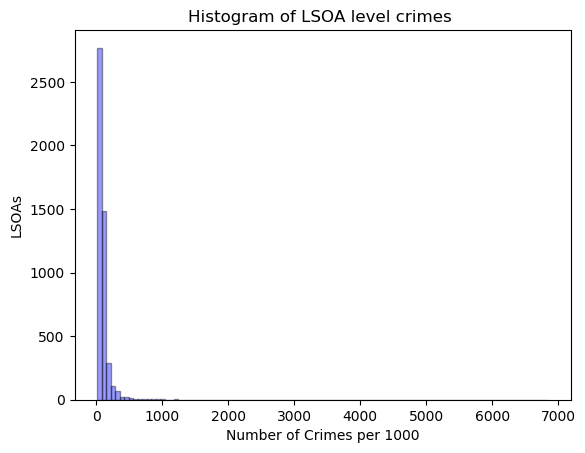

In [20]:
# matplotlib histogram
#plt.hist(crime_LSOA['Sum_Crime'], color = 'blue', edgecolor = 'black',bins = 500)

#seaborn histogram
sns.distplot(crime_df['crime_per_1000'], hist=True, kde=False, 
           bins=100, color = 'blue',
           hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of LSOA level crimes ')
plt.xlabel('Number of Crimes per 1000')
plt.ylabel('LSOAs')

In [21]:
crime_df.dtypes


LSOA                  object
objectid               int64
lsoa11nm              object
lsoa11nmw             object
st_areashape         float64
st_lengthshape       float64
geometry              object
Postcode              object
LSOA2                 object
Latitude             float64
Longitude            float64
Postcode District     object
crime_per_1000       float64
dtype: object

In [22]:
crime_df.describe()

,objectid,st_areashape,st_lengthshape,Latitude,Longitude,crime_per_1000
count,4829.000000,4.829000e+03,4829.000000,4829.000000,4829.000000,4829.000000
mean,17316.358252,3.253017e+05,2373.204752,51.505927,-0.117892,100.121607
std,9904.363015,6.353839e+05,1447.952069,0.075582,0.155099,173.455501
min,5.000000,2.384727e+03,410.093838,51.298747,-0.496741,9.556314
25%,8678.000000,1.276122e+05,1570.798602,51.452695,-0.217431,51.034483
50%,17323.000000,2.011406e+05,2036.519298,51.512905,-0.114275,70.733290
75%,25938.000000,3.262734e+05,2713.056325,51.562570,-0.015706,102.873563
max,34751.000000,1.590369e+07,21342.177910,51.682138,0.309367,6844.928751


In [23]:
#crime_df.set_index('LSOA', inplace=True)
crime_df= crime_df.dropna()
len(crime_df)

4829